In [2]:
data = pd.read_excel(r'C:\Users\HP\Desktop\CharacterToText\Img\english.xlsx')
data_image = data['image']
data_label = data['label']

In [1]:
import openpyxl
import pandas as pd
import numpy as np
from PIL import Image
import tensorflow as tf

In [3]:
url_dir = r'C:\Users\HP\Desktop\CharacterToText\Img\\'
image_list = []
for image in data_image:
    img = np.array(Image.open(url_dir+image[image.find('/'):]).convert('L').resize((50, 50))).reshape(50, 50, 1)
    image_list.append(img)

In [38]:
char_ = list(set(label for label in data_label))
print(char_)
image = image_list
label = [char_.index(label) for label in data_label]

from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(image, label, test_size = 0.2)
len(char_)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 'X', 'Q', 'a', 'h', 's', 'N', 'u', 'Y', 'b', 'l', 'H', 'i', 'j', 'o', 'r', 'V', 'n', 'c', 'f', 'D', 'C', 'S', 'e', 'E', 'm', 'p', 'U', 'F', 'L', 'g', 'B', 'G', 'T', 'I', 'R', 'v', 'A', 'W', 'k', 'x', 'y', 'q', 'J', 't', 'Z', 'd', 'z', 'M', 'w', 'O', 'P', 'K']


62

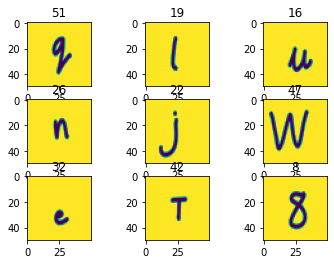

In [39]:
# vẽ một số dữ liệu ở tập train
import matplotlib.pyplot as plt
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.title(str(y_train[i]))
    plt.imshow(x_train[i])

In [40]:
x_train, y_train, x_val, y_val = np.array(x_train),  np.array(y_train), np.array(x_val), np.array(y_val)

print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(2728, 50, 50, 1)
(2728,)
(682, 50, 50, 1)
(682,)


In [41]:
# chuyển dữ liệu x_train về khoảng 0 và 1
from tensorflow.keras.utils import to_categorical
x_train, x_val = x_train/ 255.0, x_val/ 255.0

In [42]:
def create_model():
    from tensorflow.keras import models, layers
    
    model = tf.keras.models.Sequential()
    
    #Input Layer 28x28
    model.add(layers.Conv2D(28, (3, 3),padding='same', activation = 'relu', input_shape = (50, 50, 1)))

    #Maxpooling 
    model.add(layers.MaxPooling2D((2, 2))) #14x14
    model.add(layers.Conv2D(56, (3, 3),padding='same', activation = 'relu'))

    #Maxpooling 
    model.add(layers.MaxPooling2D((2, 2))) #7x7
    model.add(layers.Conv2D(56, (3, 3),padding='same', activation = 'relu'))

    #Flatten
    model.add(layers.Flatten())
    model.add(layers.Dense(56, activation = 'relu'))
    model.add(layers.Dense(62))
    
    model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), optimizer='adam', metrics=['accuracy'])
    
    return model

In [43]:
model = create_model()
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 50, 50, 28)        280       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 25, 25, 28)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 25, 25, 56)        14168     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 12, 12, 56)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 12, 12, 56)        28280     
                                                                 
 flatten_3 (Flatten)         (None, 8064)             

In [44]:
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val))

Epoch 1/20
86/86 [==============================] - 2s 19ms/step - loss: 4.1259 - accuracy: 0.0150 - val_loss: 4.0844 - val_accuracy: 0.0220
Epoch 2/20
86/86 [==============================] - 1s 13ms/step - loss: 3.7404 - accuracy: 0.0821 - val_loss: 3.1251 - val_accuracy: 0.2067
Epoch 3/20
86/86 [==============================] - 1s 12ms/step - loss: 2.4490 - accuracy: 0.3519 - val_loss: 2.0620 - val_accuracy: 0.4340
Epoch 4/20
86/86 [==============================] - 1s 12ms/step - loss: 1.5611 - accuracy: 0.5609 - val_loss: 1.6071 - val_accuracy: 0.5499
Epoch 5/20
86/86 [==============================] - 1s 13ms/step - loss: 1.0934 - accuracy: 0.6818 - val_loss: 1.4398 - val_accuracy: 0.5924
Epoch 6/20
86/86 [==============================] - 1s 12ms/step - loss: 0.8285 - accuracy: 0.7482 - val_loss: 1.2519 - val_accuracy: 0.6378
Epoch 7/20
86/86 [==============================] - 1s 13ms/step - loss: 0.6305 - accuracy: 0.8123 - val_loss: 1.2951 - val_accuracy: 0.6598
Epoch 8/20
86

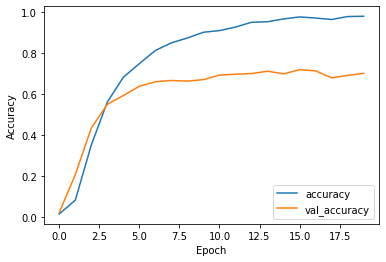

NameError: name 'x_test' is not defined

In [46]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

In [47]:
# save model
model.save('CharacterImageToCharacter.h5')

In [1]:
from tensorflow.keras.models import load_model
import tensorflow as tf
# load the model from file
model = load_model('model_DuDoanSo.h5')

In [48]:
def predict(img):
    import numpy as np
    img = img.convert('L')
    img = np.array(img)
    # img = img[:,:, 0]
    img = img.reshape(50, 50, 1)
    new_img = tf.expand_dims(img,0)
    new_img = new_img / 255
    label = np.argmax(model.predict(new_img), axis=-1)
    
    return label

In [49]:
def noise_removal(url):
    from PIL import Image
    img = Image.open(url)
    img = img.resize((28, 28))
    pixels = img.load()

    new_img = Image.new(img.mode, img.size)
    pixels_new = new_img.load()
    # lấy mã màu kiểm tra
    # góc trái trên
    r_topLeft, b_topLeft, g_topLeft = pixels[1, 1]
    # góc phải trên
    r_topRight, b_topRight, g_topRight = pixels[1, new_img.size[1]-1]
    # góc phải dưỡi
    r_botRight, b_botRight, g_botRight = pixels[new_img.size[0]-1, new_img.size[1]-1]
    # góc trái dưỡi
    r_botLeft, b_botLeft, g_botLeft = pixels[new_img.size[0]-1, 1]
    # ở giưa
    r_middle, b_middle, g_middle = pixels[new_img.size[0]-1, 1]

    difference_color = 40
    list_check = []
    row_check = []
    if r_middle - r_topLeft < difference_color or b_middle - b_topLeft < difference_color or g_middle - g_topLeft < difference_color:
        row_check.append(1)
        row_check.append(r_topLeft)
        row_check.append(b_topLeft)
        row_check.append(g_topLeft)
    else:
        row_check.append(0)
        row_check.append(r_topLeft)
        row_check.append(b_topLeft)
        row_check.append(g_topLeft)
    list_check.append(row_check)
    row_check = []
    if r_middle - r_topRight < difference_color or b_middle - b_topRight < difference_color or g_middle - g_topRight < difference_color:
        row_check.append(1)
        row_check.append(r_topRight)
        row_check.append(b_topRight)
        row_check.append(g_topRight)
    else:
        row_check.append(0)
        row_check.append(r_topRight)
        row_check.append(b_topRight)
        row_check.append(g_topRight)
    list_check.append(row_check)
    row_check = []  
    if r_middle - r_botRight < difference_color or b_middle - b_botRight < difference_color or g_middle - g_botRight < difference_color:
        row_check.append(1)
        row_check.append(r_botRight)
        row_check.append(b_botRight)
        row_check.append(g_botRight)
    else:
        row_check.append(0)
        row_check.append(r_botRight)
        row_check.append(b_botRight)
        row_check.append(g_botRight)
    list_check.append(row_check)
    row_check = []
    if r_middle - r_botLeft < difference_color or b_middle - b_botLeft < difference_color or g_middle - g_botLeft < difference_color:
        row_check.append(1)
        row_check.append(r_botLeft)
        row_check.append(b_botLeft)
        row_check.append(g_botLeft)
    else:
        row_check.append(0)   
        row_check.append(r_botLeft)
        row_check.append(b_botLeft)
        row_check.append(g_botLeft)
    list_check.append(row_check)

    count = 0
    for check_color in range(len(list_check)):
        if list_check[check_color][0] == 1:
            count += 1
    if count <= 2:
        main_color = [list_check[check_color][1], list_check[check_color][2], list_check[check_color][3]]
        for i in range(new_img.size[0]):
            for j in range(new_img.size[1]):
                r, b, g = pixels[i,j]
                if main_color[0] - difference_color < r < main_color[0] + difference_color or main_color[1] - difference_color < g < main_color[1] + difference_color or main_color[2] - difference_color < b < main_color[2] + difference_color:
                    pixels_new[i,j] = (255, 255, 255, 0)
                else:
                    pixels_new[i,j] = (0, 0, 0, 0)
    else:
        for check_color in range(len(list_check)):
            if list_check[check_color][0] == 1:
                main_color = [list_check[check_color][1], list_check[check_color][2], list_check[check_color][3]]
                break

        for i in range(new_img.size[0]):
            for j in range(new_img.size[1]):
                r, b, g = pixels[i,j]
                if main_color[0] - difference_color < r < main_color[0] + difference_color or main_color[1] - difference_color < g < main_color[1] + difference_color or main_color[2] - difference_color < b < main_color[2] + difference_color:
                    pixels_new[i,j] = (0, 0, 0, 0)
                else:
                    pixels_new[i,j] = (255, 255, 255, 0)

    return new_img

1/1 [==============================] - 0s 51ms/step


Text(0.5, 1.0, 'W')

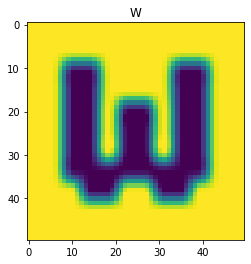

In [50]:
url = r"w.png"
# # loai bo nhieu~
# img = noise_removal(url)
# du doan
img = Image.open(url)
img = img.resize((50, 50))
label = predict(img)
# xuat
import matplotlib.pyplot as plt
plt.imshow(img)
plt.title(char_[int(label)])